In [1]:
import pandas as pd

In [2]:
nt = pd.read_csv('Network_Intrusion_Train.csv')

In [3]:
nt.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


### Handling Nulls

In [4]:
nt.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Label Encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
nt[nt.select_dtypes(include='object').columns] =nt[nt.select_dtypes(include='object').columns].apply(le.fit_transform)

In [7]:
nt.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_nt, test_nt = train_test_split(nt,test_size=0.2)

In [10]:
train_nt_x = train_nt.iloc[: , :-1]
train_nt_y = train_nt.iloc[: , -1]

In [11]:
test_nt_x = test_nt.iloc[: , :-1]
test_nt_y = test_nt.iloc[: , -1]

### Model Building

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
logreg = LogisticRegression()

In [14]:
logreg.fit(train_nt_x,train_nt_y)

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediction

In [15]:
pred = logreg.predict(test_nt_x)
pred

array([0, 0, 1, ..., 1, 0, 1])

### Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
tab = confusion_matrix(test_nt_y,pred)
tab

array([[1988,  347],
       [ 274, 2430]], dtype=int64)

### Accuracy 

In [18]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy

87.67612621551895

### Recall Score

In [19]:
from sklearn.metrics import recall_score

In [20]:
recall_score(test_nt_y,pred)

0.8986686390532544

### Precision

In [21]:
from sklearn.metrics import precision_score

In [22]:
precision_score(test_nt_y,pred)*100

87.5045012603529

### F1_Score

In [23]:
from sklearn.metrics import f1_score

In [24]:
f1_score(test_nt_y,pred)*100

88.66995073891624

### AuRoc

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve

In [26]:
pred_prob = logreg.predict_proba(test_nt_x)
pred_prob

array([[0.91074832, 0.08925168],
       [0.99002933, 0.00997067],
       [0.01971738, 0.98028262],
       ...,
       [0.17752501, 0.82247499],
       [0.98000605, 0.01999395],
       [0.03496172, 0.96503828]])

In [27]:
roc_auc_score(test_nt_y,pred_prob[ : , 1])


0.9518651090303207

In [28]:
fpr, tpr, thresh = roc_curve(test_nt_y,pred_prob[ : ,1])

In [29]:
import matplotlib.pyplot as plt

Text(0.3, 0.5, 'Area under curve is 0.94')

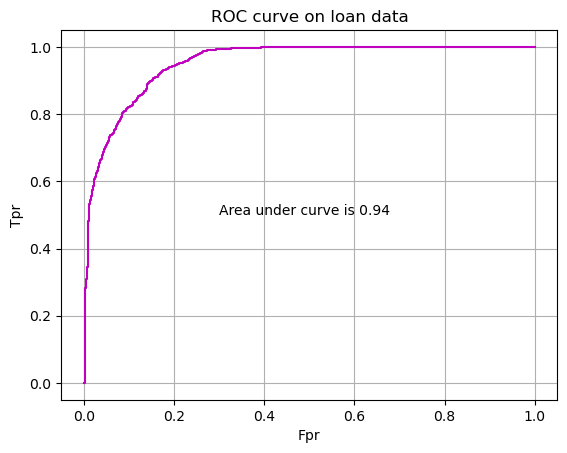

In [30]:
plt.plot(fpr,tpr, color = 'm')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve on loan data')
plt.grid()
plt.text(x=.3,y=.5,s = "Area under curve is 0.94")

In [53]:
conf_matrics_df = pd.DataFrame(tab,['Normal','Abnormal'])

In [55]:
conf_matrics_df

,0,1
Normal,1988,347
Abnormal,274,2430


In [56]:
1988*100/(1988+347) 

85.13918629550321

In [57]:
274*100/(274+2430)

10.133136094674557

### Conclusion

 85% normal transaction detected by model and 15% transaction detected as fraud 
    
but actually that 15% transactioons are not fraud
    
10% of transaction are fraud and model is not predicting that

SO model is not good